## EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("completed_flat_price_2017_2023.csv")

In [3]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0,874 YISHUN ST 81 Singapore,103.836161,1.415322
146868,2023-02,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,64 years 02 months,700000.0,871 YISHUN ST 81 Singapore,103.837412,1.413099
146869,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0,652 YISHUN AVE 4 Singapore,103.840162,1.423613
146870,2023-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,64 years 10 months,838000.0,325 YISHUN CENTRAL Singapore,103.842030,1.429345


In [4]:
df[df['block']=='406']

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941
561,2017-01,JURONG WEST,4 ROOM,406,JURONG WEST ST 42,07 TO 09,106.0,Model A,1984,66 years 07 months,368888.0,406 JURONG WEST ST 42 Singapore,103.722454,1.354302
1456,2017-02,CHOA CHU KANG,4 ROOM,406,CHOA CHU KANG AVE 3,01 TO 03,104.0,Model A,1993,75 years 05 months,340000.0,406 CHOA CHU KANG AVE 3 Singapore,103.740049,1.380195
1861,2017-02,SEMBAWANG,4 ROOM,406,SEMBAWANG DR,07 TO 09,86.0,Model A2,2001,83 years 01 month,342000.0,406 SEMBAWANG DR Singapore,103.817356,1.451494
2464,2017-03,BISHAN,3 ROOM,406,SIN MING AVE,10 TO 12,64.0,Simplified,1987,69 years 02 months,332000.0,406 SIN MING AVE Singapore,103.833785,1.363117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141337,2022-12,BEDOK,5 ROOM,406,BEDOK NTH AVE 3,07 TO 09,118.0,Improved,1980,56 years 09 months,630000.0,406 BEDOK NORTH AVE 3 Singapore,103.934521,1.328206
141563,2022-12,BUKIT PANJANG,5 ROOM,406,FAJAR RD,01 TO 03,122.0,Improved,1989,65 years 03 months,540000.0,406 FAJAR RD Singapore,103.771216,1.380815
142850,2022-12,TAMPINES,3 ROOM,406,TAMPINES ST 41,04 TO 06,64.0,Simplified,1986,63 years,390000.0,406 TAMPINES ST 41 Singapore,103.945978,1.358087
143411,2023-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,55 years 05 months,267000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941


In [5]:
# checking for missing values
df.isna().sum()

month                   0
town                    0
flat_type               0
block                   0
street_name             0
storey_range            0
floor_area_sqm          0
flat_model              0
lease_commence_date     0
remaining_lease         0
resale_price            0
full_address            0
Longitude              30
Latitude                0
dtype: int64

In [6]:
# summary statistics
df.describe()

,floor_area_sqm,lease_commence_date,resale_price,Longitude,Latitude
count,146872.000000,146872.000000,1.468720e+05,146842.000000,146872.000000
mean,97.599526,1995.516661,4.783159e+05,103.842286,1.367348
std,24.088081,13.730146,1.655338e+05,0.070984,0.047009
min,31.000000,1966.000000,1.400000e+05,103.685206,0.000000
25%,82.000000,1985.000000,3.580000e+05,103.783113,1.336819
50%,94.000000,1996.000000,4.480000e+05,103.847457,1.367955
75%,113.000000,2007.000000,5.658000e+05,103.899583,1.396438
max,249.000000,2019.000000,1.418000e+06,103.987631,1.457027


In [7]:
# pre processing:
# removing outliers (3std away) for resale_price
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd
    
    return (low, high)

lower, upper = three_sd_range(df["resale_price"])
df_cleaned  = df[ (df.resale_price>=lower) & (df.resale_price<=upper)]

df_cleaned=df


In [8]:
# converting remaining_lease to int format:

def convert_lease_to_int(lease_str):
    parts = lease_str.split()
    years = int(parts[0])
    return years

df_cleaned['remaining_lease_years'] = df['remaining_lease'].apply(convert_lease_to_int)



In [9]:
# encoding flat_type and storey_range to ordinal data:
labelencoder = LabelEncoder()
df_cleaned['flat_type_encoded'] = labelencoder.fit_transform(df_cleaned['flat_type'])
df_cleaned['storey_range_encoded'] = labelencoder.fit_transform(df_cleaned['storey_range'])

df_cleaned

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,full_address,Longitude,Latitude,remaining_lease_years,flat_type_encoded,storey_range_encoded
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,406 ANG MO KIO AVE 10 Singapore,103.856785,1.369941,61,1,3
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,108 ANG MO KIO AVE 4 Singapore,103.839917,1.379242,60,2,0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,602 ANG MO KIO AVE 5 Singapore,103.835425,1.380760,62,2,0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,465 ANG MO KIO AVE 10 Singapore,103.857175,1.366223,62,2,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,601 ANG MO KIO AVE 5 Singapore,103.835076,1.380987,62,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,2023-02,YISHUN,5 ROOM,874,YISHUN ST 81,01 TO 03,127.0,Improved,1988,64 years 01 month,700000.0,874 YISHUN ST 81 Singapore,103.836161,1.415322,64,4,0
146868,2023-02,YISHUN,5 ROOM,871,YISHUN ST 81,10 TO 12,122.0,Improved,1988,64 years 02 months,700000.0,871 YISHUN ST 81 Singapore,103.837412,1.413099,64,4,3
146869,2023-02,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,68 years 05 months,1068000.0,652 YISHUN AVE 4 Singapore,103.840162,1.423613,68,5,2
146870,2023-02,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,64 years 10 months,838000.0,325 YISHUN CENTRAL Singapore,103.842030,1.429345,64,5,3


In [10]:
# extracting features:
df2= df_cleaned[['month','town', 
                 'flat_type', 'flat_type_encoded',
                 'storey_range', 'storey_range_encoded',
                 'floor_area_sqm', 'remaining_lease_years', 'full_address','resale_price', 

                 ]]
df2

,month,town,flat_type,flat_type_encoded,storey_range,storey_range_encoded,floor_area_sqm,remaining_lease_years,full_address,resale_price
0,2017-01,ANG MO KIO,2 ROOM,1,10 TO 12,3,44.0,61,406 ANG MO KIO AVE 10 Singapore,232000.0
1,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,60,108 ANG MO KIO AVE 4 Singapore,250000.0
2,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,62,602 ANG MO KIO AVE 5 Singapore,262000.0
3,2017-01,ANG MO KIO,3 ROOM,2,04 TO 06,1,68.0,62,465 ANG MO KIO AVE 10 Singapore,265000.0
4,2017-01,ANG MO KIO,3 ROOM,2,01 TO 03,0,67.0,62,601 ANG MO KIO AVE 5 Singapore,265000.0
...,...,...,...,...,...,...,...,...,...,...
146867,2023-02,YISHUN,5 ROOM,4,01 TO 03,0,127.0,64,874 YISHUN ST 81 Singapore,700000.0
146868,2023-02,YISHUN,5 ROOM,4,10 TO 12,3,122.0,64,871 YISHUN ST 81 Singapore,700000.0
146869,2023-02,YISHUN,EXECUTIVE,5,07 TO 09,2,181.0,68,652 YISHUN AVE 4 Singapore,1068000.0
146870,2023-02,YISHUN,EXECUTIVE,5,10 TO 12,3,146.0,64,325 YISHUN CENTRAL Singapore,838000.0


#### Normalisation of continuous variables 
Floor area, remaining lease years, resale price

In [11]:
# Applying one hot encoding to town:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()
x = labelbinarizer.fit_transform(df2["town"])
encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
encoded_df.head()

# Normalizing numerical variables:
from sklearn.preprocessing import StandardScaler
columns = [ 'floor_area_sqm', 'remaining_lease_years', 'resale_price', ]
df2_normalized = StandardScaler().fit_transform(df2[columns])
df2_normalized= pd.DataFrame(df2_normalized, columns = columns)

df2 = df2.reset_index(drop=True)
df2_normalized = df2_normalized.reset_index(drop=True)

df2_normalized[['flat_type_encoded', 'storey_range_encoded']] = df2[['flat_type_encoded', 'storey_range_encoded']]
df2_normalized['year'] = df2['month'].str.slice(0,4)
df2_normalized = pd.concat([df2_normalized, encoded_df], axis=1)
df2_normalized


# 31 columns
# 26 columns are one hot encoded from town
# 145610 rows (encoded_df)

,floor_area_sqm,remaining_lease_years,resale_price,flat_type_encoded,storey_range_encoded,year,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,-2.225155,-0.974465,-1.488015,1,3,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.270322,-1.047702,-1.379275,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.270322,-0.901228,-1.306782,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.228808,-0.901228,-1.288659,2,1,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.270322,-0.901228,-1.288659,2,0,2017,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146867,1.220544,-0.754755,1.339212,4,0,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146868,1.012972,-0.754755,1.339212,4,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146869,3.462325,-0.461809,3.562330,5,2,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146870,2.009319,-0.754755,2.172881,5,3,2023,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


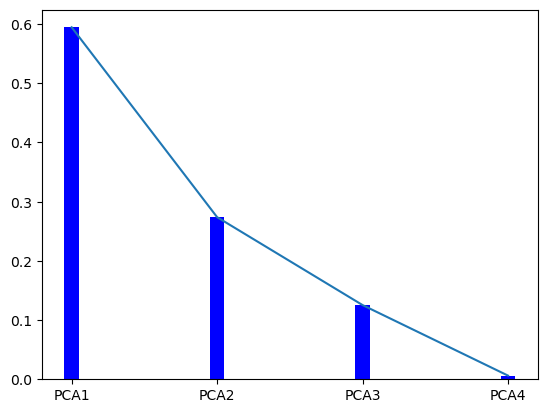

In [12]:
# PCA
from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
pca = PCA(n_components=4)


# x_pca = pca.fit_transform(df2_normalized[['floor_area_sqm', 'remaining_lease_years', 'resale_price']])
x_pca = pca.fit_transform(df2_normalized[['floor_area_sqm', 'remaining_lease_years', 'flat_type_encoded', 'storey_range_encoded']])


x_pca = pd.DataFrame(x_pca)
df4_names = []
y= pca.explained_variance_ratio_

for i in range(len(y)):
    df4_names.append('PCA'+str(i+1))

default_x_ticks = range(len(df4_names))

plt.plot(default_x_ticks, y)
plt.bar(default_x_ticks, y,width=0.1,color= 'blue')
plt.xticks(default_x_ticks, df4_names)
plt.show()


In [13]:
# Splitting into 3 df:
full_dataset = df2_normalized
precovid_dataset = df2_normalized[(df2_normalized['year'] >= "2017") & (df2_normalized['year'] <= "2019")]
postcovid_dataset = df2_normalized[(df2_normalized['year'] >= "2020") ]


In [14]:
# splitting into train-test split for all 3 data sets
# use randome state=42

# For full_dataset:
X1=full_dataset.drop(columns='resale_price')
y1= full_dataset['resale_price']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)


# For precovid_dataset:
X2=precovid_dataset.drop(columns='resale_price')
y2= precovid_dataset['resale_price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


# For postcovid_dataset:
X3=postcovid_dataset.drop(columns='resale_price')
y3= postcovid_dataset['resale_price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)


In [15]:
full_dataset
X2

,floor_area_sqm,remaining_lease_years,flat_type_encoded,storey_range_encoded,year,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,...,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,-2.225155,-0.974465,1,3,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.270322,-1.047702,2,0,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.270322,-0.901228,2,0,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.228808,-0.901228,2,1,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.270322,-0.901228,2,0,2017,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64251,1.843261,-0.535045,5,1,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64252,2.009319,-0.535045,5,2,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64253,2.756579,-0.242099,5,0,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
64254,2.756579,-0.242099,5,3,2019,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Linear Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.ensemble import BaggingRegressor


# creating helper function to z
def linearRegressionFunction(X3, y3, variable):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[[variable]], y3, test_size=0.2, random_state=42)

    # Now X_train1 and X_test1 are 2D
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train3, y_train3)

    # Make predictions
    y_pred = model.predict(X_test3)

    # Evaluate the model
    mse = mean_squared_error(y_test3, y_pred)
    print(f'Mean Squared Error (LR): {mse}')
    r2 = r2_score(y_test3, y_pred)
    print(f'R^2 Score (LR): {r2}')
    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (LR):", explained_variance)



    # Scatter plot of the data points
    plt.scatter(X3[variable], y3, color='blue', label='Data Points')

    # Regression line - using the model to predict values over the entire range of X1
    # This assumes X1 is a DataFrame with a single column for floor_area_sqm
    plt.plot(X3[variable], model.predict(X3[[variable]]), color='red', label='Regression Line')

    # Labeling the plot
    # plt.title('Regression Analysis of Floor Area on Resale Price')
    title = "Regression Analysis of " +variable + " on Resale Price"
    plt.title(title)
    plt.xlabel(variable)
    plt.ylabel('Resale Price')
    plt.legend()

    # Show the plot
    plt.show()

# def catboostFunction(X3, y3, variable):
#     # Splitting the data into training and testing sets
#     X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[[variable]], y3, test_size=0.2, random_state=42)

#     model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, random_state=42)
#     model.fit(X_train3, y_train3)
#     y_pred = model.predict(X_test3)

#     mse = mean_squared_error(y_test3, y_pred)
#     r2 = r2_score(y_test3, y_pred)

#     print(f'Mean Squared Error (catboost): {mse}')
#     print(f'R^2 Score (catboost): {r2}')

#     explained_variance = explained_variance_score(y_test3, y_pred)
#     print("Explained Variance Score (catboost):", explained_variance)

def adaboostFunction(X3, y3, variable):
    # Splitting the data into training and testing sets
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[[variable]], y3, test_size=0.2, random_state=42)

    model = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10, random_state=42)
    model.fit(X_train3, y_train3)
    y_pred = model.predict(X_test3)

    mse = mean_squared_error(y_test3, y_pred)
    r2 = r2_score(y_test3, y_pred)

    print(f'Mean Squared Error (adaboost): {mse}')
    print(f'R^2 Score (adaboost): {r2}')

    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (adaboost):", explained_variance)

def baggingFunction(X3, y3, variable):
    # Splitting the data into training and testing sets
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[[variable]], y3, test_size=0.2, random_state=42)

    model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
    model.fit(X_train3, y_train3)
    y_pred = model.predict(X_test3)

    mse = mean_squared_error(y_test3, y_pred)
    r2 = r2_score(y_test3, y_pred)

    print(f'Mean Squared Error (bagging): {mse}')
    print(f'R^2 Score (bagging): {r2}')

    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (bagging):", explained_variance)

# creating helper function to z
def linearRegressionFunctionMulti(X3, y3, variable):
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[variable], y3, test_size=0.2, random_state=42)

    # Now X_train1 and X_test1 are 2D
    # Create and train the linear regression model
    model = LinearRegression()
    model.fit(X_train3, y_train3)

    # Make predictions
    y_pred = model.predict(X_test3)

    # Evaluate the model
    mse = mean_squared_error(y_test3, y_pred)
    print(f'Mean Squared Error (LR): {mse}')
    r2 = r2_score(y_test3, y_pred)
    print(f'R^2 Score (LR): {r2}')
    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (LR):", explained_variance)


# def catboostFunctionMulti(X3, y3, variable):
#     # Splitting the data into training and testing sets
#     X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[variable], y3, test_size=0.2, random_state=42)

#     model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=10, random_state=42)
#     model.fit(X_train3, y_train3)
#     y_pred = model.predict(X_test3)

#     mse = mean_squared_error(y_test3, y_pred)
#     r2 = r2_score(y_test3, y_pred)

#     print(f'Mean Squared Error (catboost): {mse}')
#     print(f'R^2 Score (catboost): {r2}')

#     explained_variance = explained_variance_score(y_test3, y_pred)
#     print("Explained Variance Score (catboost):", explained_variance)

def adaboostFunctionMulti(X3, y3, variable):
    # Splitting the data into training and testing sets
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[variable], y3, test_size=0.2, random_state=42)

    model = AdaBoostRegressor(base_estimator=LinearRegression(), n_estimators=10, random_state=42)
    model.fit(X_train3, y_train3)
    y_pred = model.predict(X_test3)

    mse = mean_squared_error(y_test3, y_pred)
    r2 = r2_score(y_test3, y_pred)

    print(f'Mean Squared Error (adaboost): {mse}')
    print(f'R^2 Score (adaboost): {r2}')

    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (adaboost):", explained_variance)

def baggingFunctionMulti(X3, y3, variable):
    # Splitting the data into training and testing sets
    X_train3, X_test3, y_train3, y_test3 = train_test_split(X3[variable], y3, test_size=0.2, random_state=42)

    model = BaggingRegressor(base_estimator=LinearRegression(), n_estimators=50, random_state=42)
    model.fit(X_train3, y_train3)
    y_pred = model.predict(X_test3)

    mse = mean_squared_error(y_test3, y_pred)
    r2 = r2_score(y_test3, y_pred)

    print(f'Mean Squared Error (bagging): {mse}')
    print(f'R^2 Score (bagging): {r2}')

    explained_variance = explained_variance_score(y_test3, y_pred)
    print("Explained Variance Score (bagging):", explained_variance)

#### Floor Area on Resale Price (Pre-covid dataset)


Mean Squared Error (LR): 0.5093096199826871
R^2 Score (LR): 0.4081367627969267
Explained Variance Score (LR): 0.4081569738460348


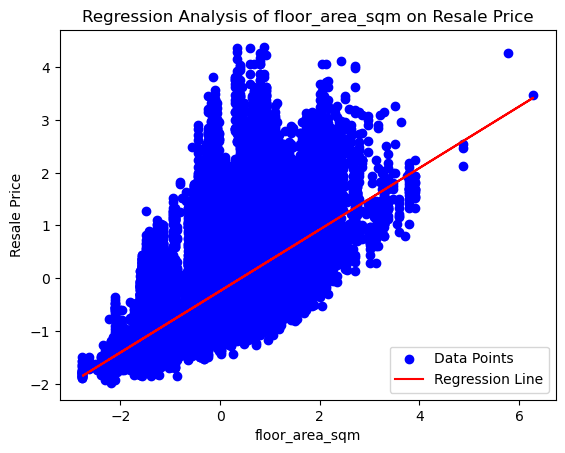

Mean Squared Error (adaboost): 0.6258040561091789
R^2 Score (adaboost): 0.27275983022629147
Explained Variance Score (adaboost): 0.4065440075356622
Mean Squared Error (bagging): 0.5093094714487754
R^2 Score (bagging): 0.4081369354065897
Explained Variance Score (bagging): 0.4081551663193881


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [17]:
linearRegressionFunction(X2,y2,"floor_area_sqm")
# catboostFunction(X3,y3,"floor_area_sqm")
adaboostFunction(X2,y2,"floor_area_sqm")
baggingFunction(X2,y2,"floor_area_sqm")

In [18]:
# Add a constant to the feature set for statsmodels
X_sm = sm.add_constant(X2[['floor_area_sqm']])

# Fit the model
model_sm = sm.OLS(y2, X_sm).fit()

# Output the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 4.297e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:55:20   Log-Likelihood:                -69983.
No. Observations:               64256   AIC:                         1.400e+05
Df Residuals:                   64254   BIC:                         1.400e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2416      0.003    -85.

#### Remaining Lease Years on Resale Price (Post-covid dataset)

Mean Squared Error (LR): 0.7740664393752986
R^2 Score (LR): 0.10046570760926465
Explained Variance Score (LR): 0.100466027710574


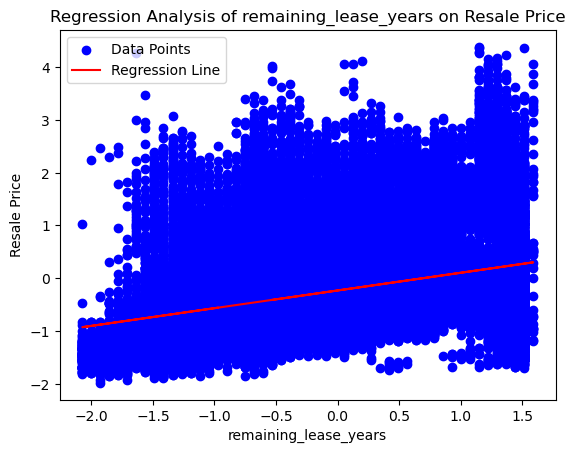

Mean Squared Error (adaboost): 0.8613278717930721
R^2 Score (adaboost): -0.0009398654398291573
Explained Variance Score (adaboost): 0.10047975616011107
Mean Squared Error (bagging): 0.7740649473137818
R^2 Score (bagging): 0.1004674415179222
Explained Variance Score (bagging): 0.10046768899417002


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [19]:
linearRegressionFunction(X2,y2,"remaining_lease_years")
# catboostFunction(X3,y3,"remaining_lease_years")
adaboostFunction(X2,y2,"remaining_lease_years")
baggingFunction(X2,y2,"remaining_lease_years")

In [20]:
# Add a constant to the feature set for statsmodels
X_RLS = sm.add_constant(X2[['remaining_lease_years']])

# Fit the model
model_sm = sm.OLS(y2, X_RLS).fit()

# Output the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     7704.
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:55:44   Log-Likelihood:                -82796.
No. Observations:               64256   AIC:                         1.656e+05
Df Residuals:                   64254   BIC:                         1.656e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

#### Summary statistics: Continuous variables (floor area and remaining lease years) on Resale Price
R-squared value: 0.45

In [21]:
numerical_dataset = precovid_dataset[['floor_area_sqm', 'remaining_lease_years']]

# Add a constant to the feature set for statsmodels
X_combined = sm.add_constant(numerical_dataset)

# Fit the model
model_sm = sm.OLS(y2, X_combined).fit()

# Output the summary of the model
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:           resale_price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.508e+04
Date:                Mon, 25 Mar 2024   Prob (F-statistic):               0.00
Time:                        17:55:57   Log-Likelihood:                -67899.
No. Observations:               64256   AIC:                         1.358e+05
Df Residuals:                   64253   BIC:                         1.358e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.23

In [22]:
linearRegressionFunctionMulti(X_combined,y2, ['floor_area_sqm', 'remaining_lease_years'])
adaboostFunctionMulti(X_combined,y2, ['floor_area_sqm', 'remaining_lease_years'])
baggingFunctionMulti(X_combined,y2, ['floor_area_sqm', 'remaining_lease_years'])


Mean Squared Error (LR): 0.47942053719880445
R^2 Score (LR): 0.4428705447626017
Explained Variance Score (LR): 0.44288215684878673


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (adaboost): 0.5786833175653147
R^2 Score (adaboost): 0.327518334208445
Explained Variance Score (adaboost): 0.4003574875184971


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (bagging): 0.47942152651723186
R^2 Score (bagging): 0.44286939508628664
Explained Variance Score (bagging): 0.4428800373358809


#### Analysis on categorical variables (flat type and storey range) on Resale Price


In [23]:
X_combined = precovid_dataset.iloc[:, 3:5]

# # Add a constant to the feature set for statsmodels
# X_combined = sm.add_constant(numerical_dataset)

# # Fit the model
# model_sm = sm.OLS(y3, X_combined).fit()

# # Output the summary of the model
# print(model_sm.summary())
X_combined

,flat_type_encoded,storey_range_encoded
0,1,3
1,2,0
2,2,0
3,2,1
4,2,0
...,...,...
64251,5,1
64252,5,2
64253,5,0
64254,5,3


##### Cat boosting

In [24]:
variables = ['flat_type_encoded', 'storey_range_encoded']
linearRegressionFunctionMulti(X_combined,y2, variables)
adaboostFunctionMulti(X_combined,y2, variables)
baggingFunctionMulti(X_combined,y2, variables)

Mean Squared Error (LR): 0.4121477731705565
R^2 Score (LR): 0.5210475010406134
Explained Variance Score (LR): 0.5210737042895061


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (adaboost): 0.4399192379541058
R^2 Score (adaboost): 0.48877458020078834
Explained Variance Score (adaboost): 0.5191957948777304
Mean Squared Error (bagging): 0.4121372110319647
R^2 Score (bagging): 0.5210597751883881
Explained Variance Score (bagging): 0.5210830925220836


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


#### Flat Type on Resale Price

Mean Squared Error (LR): 0.5030216727769834
R^2 Score (LR): 0.41544391868504105
Explained Variance Score (LR): 0.41547173234798396


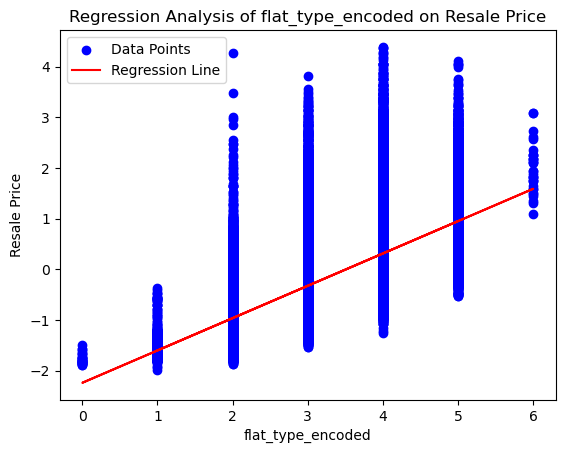

Mean Squared Error (adaboost): 0.5857439062891864
R^2 Score (adaboost): 0.31931329991356505
Explained Variance Score (adaboost): 0.413711081309069
Mean Squared Error (bagging): 0.5030185879165691
R^2 Score (bagging): 0.41544750356818394
Explained Variance Score (bagging): 0.41547216445572144


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [25]:
linearRegressionFunction(X2[['flat_type_encoded']], y2, "flat_type_encoded")
adaboostFunction(X2[['flat_type_encoded']], y2, "flat_type_encoded")
baggingFunction(X2[['flat_type_encoded']], y2, "flat_type_encoded")

#### Storey Range on Resale Price

Mean Squared Error (LR): 0.7485797118179314
R^2 Score (LR): 0.13008355986646125
Explained Variance Score (LR): 0.13008418859710635


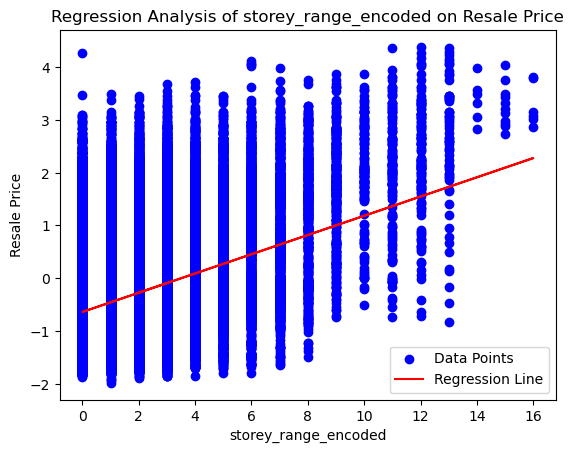

Mean Squared Error (adaboost): 0.8027038041830871
R^2 Score (adaboost): 0.06718653365476679
Explained Variance Score (adaboost): 0.1296956196482869
Mean Squared Error (bagging): 0.7485657228311674
R^2 Score (bagging): 0.13009981631767775
Explained Variance Score (bagging): 0.13010040474899776


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [26]:
linearRegressionFunction(X2[['storey_range_encoded']], y2, "storey_range_encoded")
adaboostFunction(X2[['storey_range_encoded']], y2, "storey_range_encoded")
baggingFunction(X2[['storey_range_encoded']], y2, "storey_range_encoded")

#### Summary statistics: All variables (floor area, remaining lease years, flat type and storey range) on Resale Price
R-squared value: 0.53

In [27]:
X_combined = precovid_dataset.iloc[:, 0:5]
# X_combined = sm.add_constant(numerical_dataset.iloc[:,0:5])
# model_sm = sm.OLS(y3, X_combined).fit()
# print(model_sm.summary())
X_combined

,floor_area_sqm,remaining_lease_years,resale_price,flat_type_encoded,storey_range_encoded
0,-2.225155,-0.974465,-1.488015,1,3
1,-1.270322,-1.047702,-1.379275,2,0
2,-1.270322,-0.901228,-1.306782,2,0
3,-1.228808,-0.901228,-1.288659,2,1
4,-1.270322,-0.901228,-1.288659,2,0
...,...,...,...,...,...
64251,1.843261,-0.535045,0.614282,5,1
64252,2.009319,-0.535045,0.523665,5,2
64253,2.756579,-0.242099,0.934459,5,0
64254,2.756579,-0.242099,1.876191,5,3


##### Cat boosting

In [28]:
variables = ['floor_area_sqm', 'remaining_lease_years','flat_type_encoded', 'storey_range_encoded']
linearRegressionFunctionMulti(X_combined,y2, variables)
adaboostFunctionMulti(X_combined,y2, variables)
baggingFunctionMulti(X_combined,y2, variables)

Mean Squared Error (LR): 0.3937165847608833
R^2 Score (LR): 0.5424661870611519
Explained Variance Score (LR): 0.5424835547714786


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (adaboost): 0.4388442440271998
R^2 Score (adaboost): 0.49002381909318127
Explained Variance Score (adaboost): 0.5295350800074267


/Users/poyry/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error (bagging): 0.39369549305393287
R^2 Score (bagging): 0.5424906975071833
Explained Variance Score (bagging): 0.5425064582539527
